### Task 1: Import Packages and Functions

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
print(tf.__version__)


2.3.1


### Task 2: Load and Explore Data

In [3]:
# Load data
train_df = pd.read_csv('train.csv').fillna(' ')
train_df.sample(10, random_state=1)

,comment_text,toxic
24915,"YOU ARE A FAT, GEEKY PRICK WHO HAS NOTHING TO ...",1
75819,Agent X2: Basically thanks - with a 'little' m...,0
53891,Why are my posts being deleted? \n\nI have tri...,0
154159,"""\n\n Controlled Demolitions and Common Sense ...",0
13040,I do not understand your reply. //Blaxthos ( ...,0
123190,Is this the bizarro world? Removing content is...,0
33626,"Well, WP:RS says that articles should use reli...",0
1150,Oh hear me go someone removes all my pages i g...,0
48633,can't believe this article was deleted\nI'm su...,0
42817,"""\n\n Comments on GamerGate Workshop page \n\n...",0


In [4]:
train_df.head()

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [5]:
x = train_df['comment_text'].values

In [6]:
# View few toxic comments
train_df.loc[train_df['toxic']==1].sample(10, random_state=10)

,comment_text,toxic
30575,"""\n Are you asking if we would ever block some...",1
36038,Amen my sock-pupinski brother!! Hack-a-long: p...,1
19730,JUST READ THE FUCKING CENSUS DATA. Do you thin...,1
72261,u no wat ass hole go fuck your self and stop b...,1
77923,Go fuck yourself \n\nEat shit and die. 68.0.11...,1
16382,A big thank you\n\nYou have just blocked me in...,1
41247,A message from Jasonceyre \n\n f uc k you ho...,1
69311,"I'm gonna get the ACLU on you, you racist anti...",1
142032,"Hey Freepsbane, does your mother know that you...",1
5613,You guys suk. You really really suck. Fuck you...,1


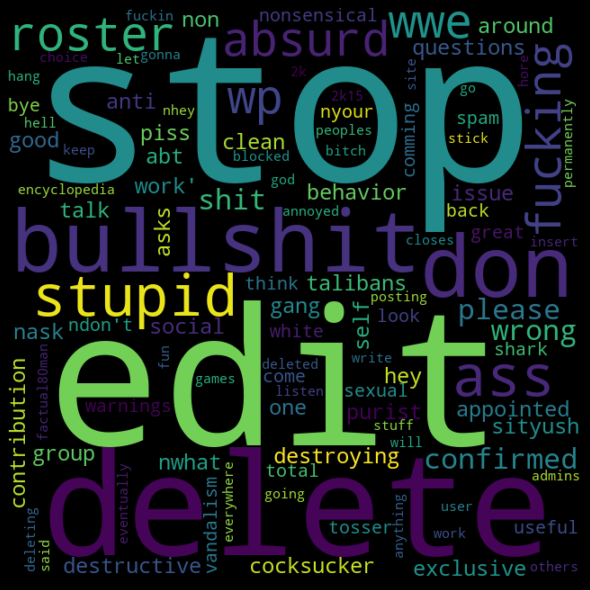

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = train_df['comment_text'].loc[train_df['toxic']==1].apply(str.lower).values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [7]:
y = train_df['toxic'].values
print(y)

[0 0 0 ... 0 0 0]


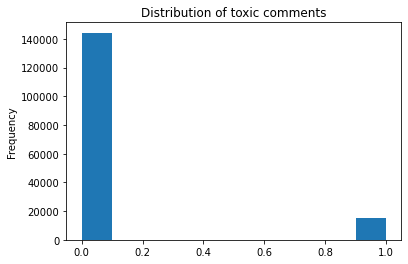

In [8]:
# Plot frequency of toxic comments
train_df['toxic'].plot(kind='hist', title='Distribution of toxic comments');

In [9]:
train_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

### Task 3: Data Prep — Tokenize and Pad Text Data

In [10]:
max_features = 20000
max_text_length = 400

In [11]:
x_tokenizer = text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen= max_text_length)

### Task 4: Prepare Embedding Matrix with Pre-trained GloVe Embeddings

In [12]:
embedding_dim = 100
embeddings_index = dict()

with open('glove.6B.100d.txt/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
        
print(f'Found {len(embeddings_index)} word vectors.')

Found 400000 word vectors.


In [13]:
x_tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'have': 18,
 'are': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'page': 27,
 'wikipedia': 28,
 'my': 29,
 'an': 30,
 'from': 31,
 'by': 32,
 'do': 33,
 'at': 34,
 'me': 35,
 'about': 36,
 'so': 37,
 'talk': 38,
 'what': 39,
 'can': 40,
 'there': 41,
 'all': 42,
 'has': 43,
 'will': 44,
 'please': 45,
 'no': 46,
 'would': 47,
 'one': 48,
 'like': 49,
 'just': 50,
 'they': 51,
 'he': 52,
 'which': 53,
 'any': 54,
 'been': 55,
 'should': 56,
 'more': 57,
 'we': 58,
 "don't": 59,
 'some': 60,
 'other': 61,
 'who': 62,
 'here': 63,
 'see': 64,
 'also': 65,
 'his': 66,
 'think': 67,
 'because': 68,
 'know': 69,
 'how': 70,
 'edit': 71,
 'am': 72,
 "i'm": 73,
 'people': 74,
 'why': 75,
 'up': 76,
 'only': 77,
 "it's": 78,
 'out': 79,
 'articles': 80,
 'use': 81,

In [14]:
embeddings_matrix = np.zeros((max_features, embedding_dim))
for word, index in x_tokenizer.word_index.items():
    if index > max_features - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embeddings_matrix[index] = embedding_vector
            
embeddings_matrix


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       ...,
       [-1.04809999, -0.32789999, -0.46593001, ..., -0.065447  ,
        -0.13019   ,  0.44433001],
       [ 0.089782  , -0.33164999, -0.85716999, ..., -0.15765999,
        -0.58174002,  0.036233  ],
       [ 0.051446  , -0.43564001,  0.26989001, ...,  0.39087   ,
        -0.14459001, -0.72372001]])

### Task 5: Create the Embedding Layer

In [15]:
model = Sequential()
model.add(Embedding(max_features, 
                    embedding_dim,
                    embeddings_initializer = tf.keras.initializers.Constant(embeddings_matrix),
                    trainable=False))
model.add(Dropout(0.2))

### Task 6: Build the Model

In [16]:
filters = 250
kernel_size = 3
hidden_dims = 250

In [17]:
model.add(Conv1D(filters,
                kernel_size,
                padding='valid'))
model.add(MaxPooling1D())
model.add(Conv1D(filters,
                5,
                padding='valid',
                activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2000000   
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 250)         75250     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 250)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 250)         312750    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               6

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

### Task 7: Train Model

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size=0.15, random_state=1)

In [20]:
batch_size = 32
epochs =3
model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_val, y_val))

Epoch 1/3
4239/4239 [==============================] - 803s 189ms/step - loss: 0.1531 - accuracy: 0.9448 - val_loss: 0.1276 - val_accuracy: 0.9524
Epoch 2/3
4239/4239 [==============================] - 851s 201ms/step - loss: 0.1333 - accuracy: 0.9508 - val_loss: 0.1256 - val_accuracy: 0.9515
Epoch 3/3
4239/4239 [==============================] - 889s 210ms/step - loss: 0.1249 - accuracy: 0.9543 - val_loss: 0.1190 - val_accuracy: 0.9552


### Task 8: Evaluate Model

In [21]:
test_df = pd.read_csv('test.csv')

In [22]:
x_test = test_df['comment_text'].values

In [23]:
x_text_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_testing = sequence.pad_sequences(x_text_tokenized, maxlen= max_text_length)

In [24]:
y_testing = model.predict(x_testing, verbose=1, batch_size=32)

4787/4787 [==============================] - 240s 50ms/step


In [25]:
y_testing.shape

(153164, 1)

In [26]:
y_testing[0]

array([0.9991573], dtype=float32)

In [27]:
test_df['Toxic'] = ['not toxic' if x<0.5 else 'toxic' for x in y_testing]
test_df[['comment_text', 'Toxic']].head(20) #.sample(20, random_state=1)

,comment_text,Toxic
0,Yo bitch Ja Rule is more succesful then you'll...,toxic
1,== From RfC == \n\n The title is fine as it is...,not toxic
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",not toxic
3,":If you have a look back at the source, the in...",not toxic
4,I don't anonymously edit articles at all.,not toxic
5,Thank you for understanding. I think very high...,not toxic
6,Please do not add nonsense to Wikipedia. Such ...,not toxic
7,:Dear god this site is horrible.,not toxic
8,""" \n Only a fool can believe in such numbers. ...",not toxic
9,== Double Redirects == \n\n When fixing double...,not toxic
